## 0: Data Input & Transformation

Train Dataset Size: 500
Training Dataset Class distribution:
most_used_app_category
1    180
0    170
2    150
Name: count, dtype: int64


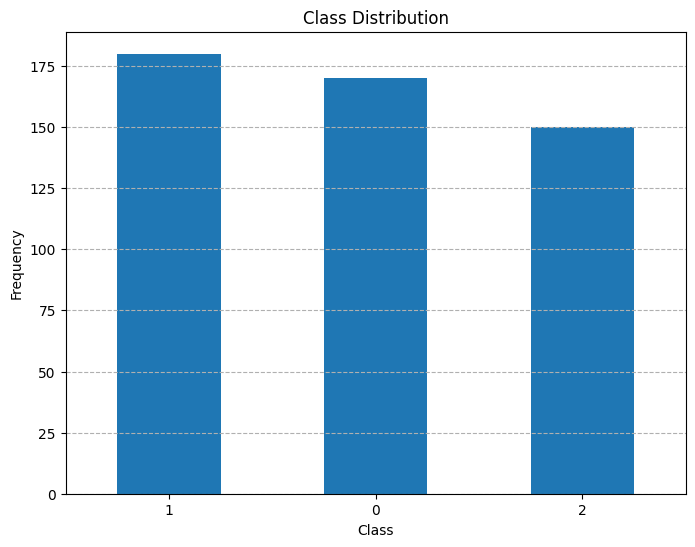

Test Dataset Size: 500
Test Dataset Class distribution:
most_used_app_category
1    169
0    168
2    163
Name: count, dtype: int64


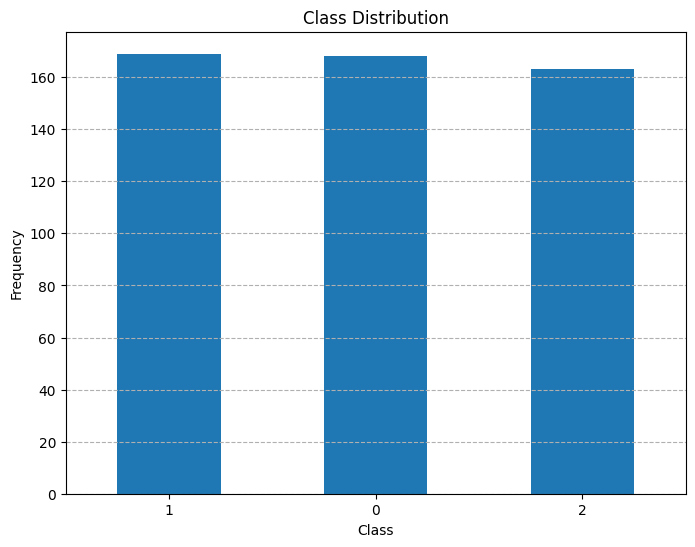

In [17]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt

data_file = 'user_data.csv'
df_mobile = pd.read_csv(data_file)

df_mobile['Gender'] = df_mobile['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

categories = ["Social_Media_Usage_Hours", "Productivity_App_Usage_Hours", "Gaming_App_Usage_Hours"]

category_mapping = {
    "Social_Media_Usage_Hours": 0,
    "Productivity_App_Usage_Hours": 1,
    "Gaming_App_Usage_Hours": 2
}

df_mobile['most_used_app_category'] = df_mobile[categories].idxmax(axis=1).map(category_mapping)

# Min-max normalization
columns_to_normalize = ["Total_App_Usage_Hours","Daily_Screen_Time_Hours","Number_of_Apps_Used"]

for column in columns_to_normalize:
    min_val = df_mobile[column].min()
    max_val = df_mobile[column].max()
    df_mobile[column] = (df_mobile[column] - min_val) / (max_val - min_val)

df_mobile = df_mobile.drop("Location", axis=1)

midpoint = len(df_mobile) // 2
train_data = df_mobile.iloc[:midpoint]
test_data = df_mobile.iloc[midpoint:]

train_data.to_csv('train_dataset.csv', index=False)
test_data.to_csv('test_dataset.csv', index=False)

print(f"Train Dataset Size: {len(train_data)}")

class_counts = train_data['most_used_app_category'].value_counts()
print("Training Dataset Class distribution:")
print(class_counts)

plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.show()

print(f"Test Dataset Size: {len(test_data)}")

class_counts = test_data['most_used_app_category'].value_counts()
print("Test Dataset Class distribution:")
print(class_counts)

plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.show()

# 1. Feature and Label

In [18]:
features = ["Age","Gender", "Total_App_Usage_Hours", "Daily_Screen_Time_Hours", "Number_of_Apps_Used"]
labels = ["most_used_app_category"]

train_features = train_data[features]
train_labels = train_data[labels]
display(train_features.head())
display(train_labels.head())

,Age,Gender,Total_App_Usage_Hours,Daily_Screen_Time_Hours,Number_of_Apps_Used
0,56,1,0.146764,0.472671,0.807692
1,46,1,0.103008,0.983834,0.576923
2,32,0,0.572470,0.268668,0.307692
3,25,0,0.018232,0.406467,0.692308
4,38,1,0.484047,0.891455,0.423077


,most_used_app_category
0,0
1,0
2,0
3,2
4,2


# 2. Visualization

Text(0, 0.5, 'Frequency')

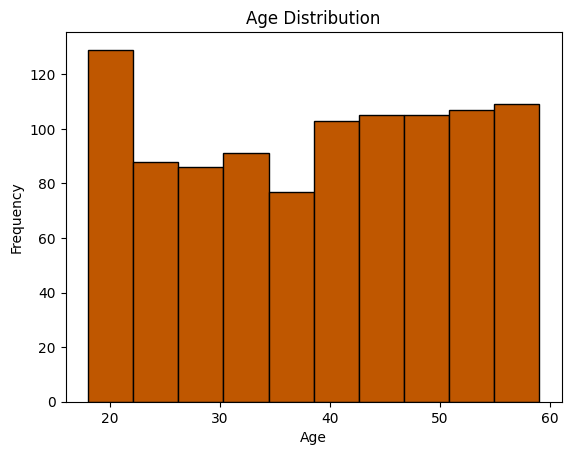

In [19]:
plt.hist(df_mobile["Age"], bins=10, color = "#BF5700",edgecolor="black")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")

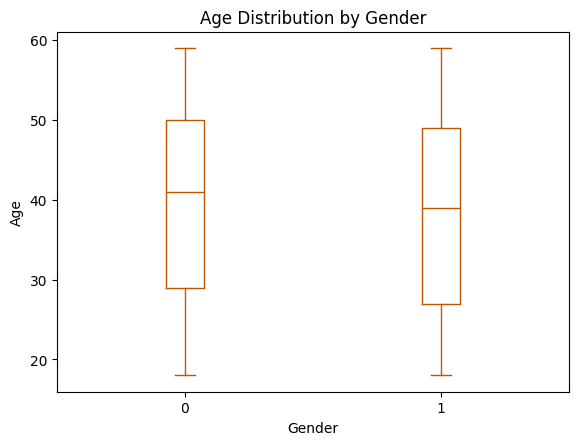

In [20]:
df_mobile.boxplot(column="Age", by="Gender", grid=False, color = "#BF5700")
plt.title("Age Distribution by Gender")
plt.suptitle("")
plt.xlabel("Gender")
plt.ylabel("Age")
plt.show()

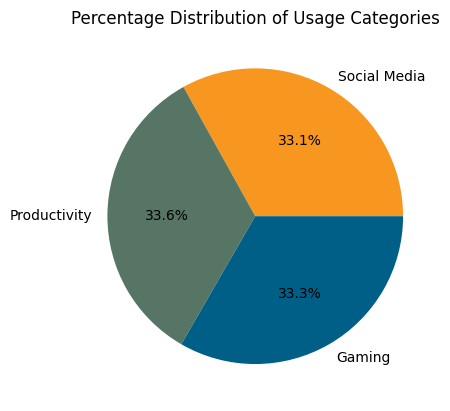

In [21]:
usage_totals = df_mobile[["Social_Media_Usage_Hours", "Productivity_App_Usage_Hours", "Gaming_App_Usage_Hours"]].sum()

labels = ["Social Media", "Productivity", "Gaming"]
colors = ["#F8971F", "#577565", "#005F86"]
plt.pie(usage_totals, labels=labels, autopct="%1.1f%%",colors=colors)
plt.title("Percentage Distribution of Usage Categories")
plt.show()

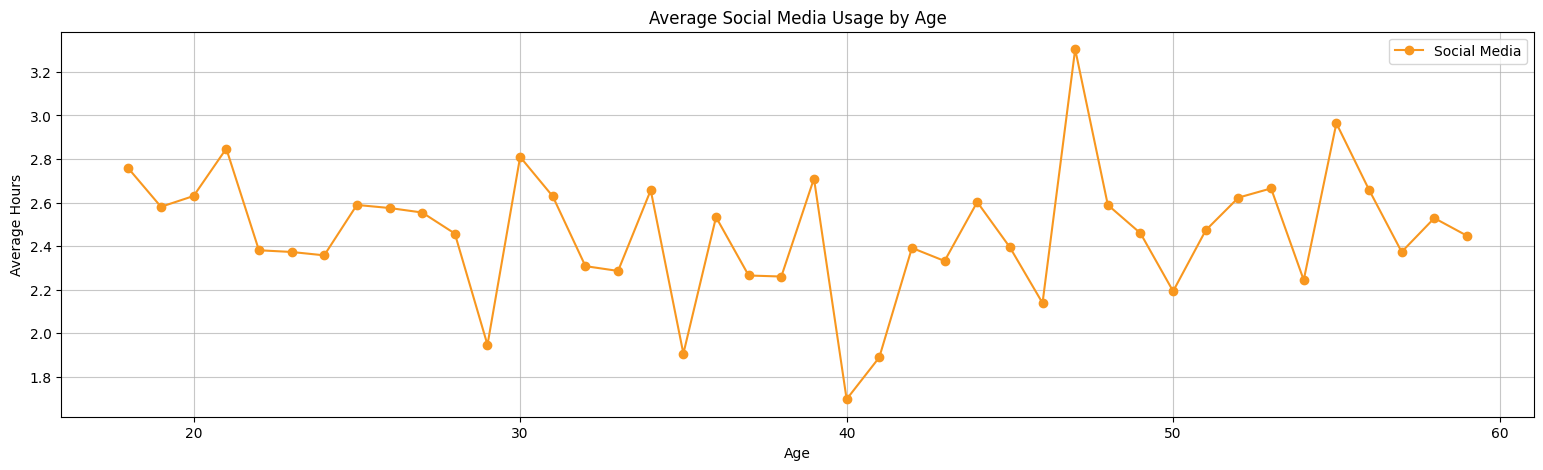

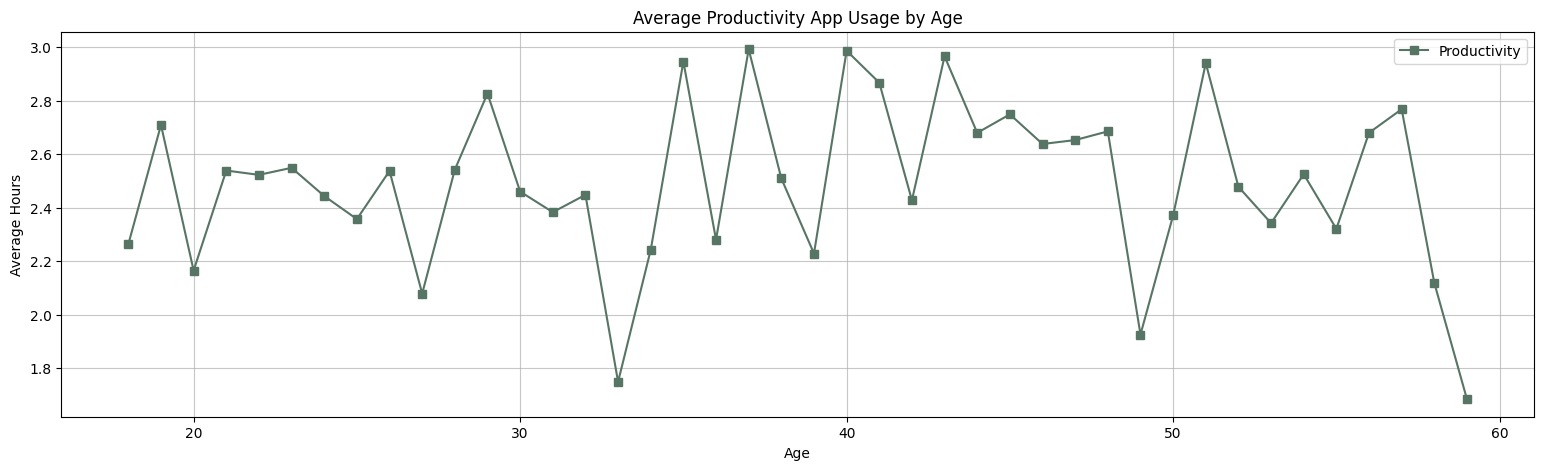

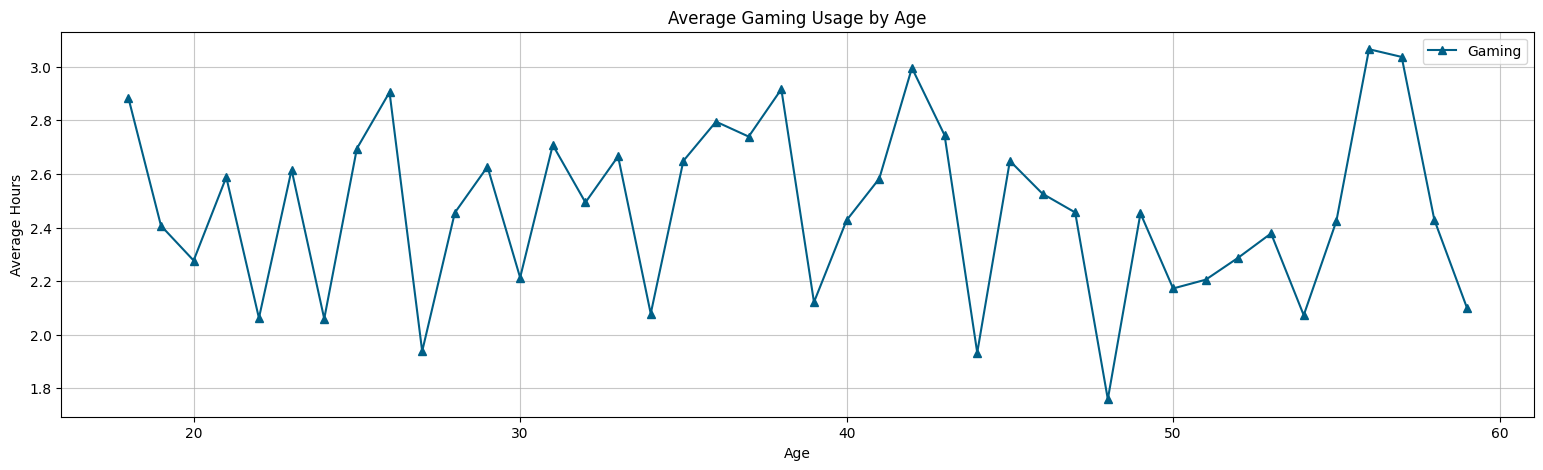

In [22]:
social_media_by_age = df_mobile.groupby("Age")["Social_Media_Usage_Hours"].mean()

plt.figure(figsize=(19, 5))
plt.plot(social_media_by_age.index, social_media_by_age, marker="o", color="#F8971F", label="Social Media")
plt.title("Average Social Media Usage by Age")
plt.xlabel("Age")
plt.ylabel("Average Hours")
plt.grid(alpha=0.7)
plt.legend()
plt.show()

productivity_by_age = df_mobile.groupby("Age")["Productivity_App_Usage_Hours"].mean()

plt.figure(figsize=(19, 5))
plt.plot(productivity_by_age.index, productivity_by_age, marker="s", color="#577565", label="Productivity")
plt.title("Average Productivity App Usage by Age")
plt.xlabel("Age")
plt.ylabel("Average Hours")
plt.grid(alpha=0.7)
plt.legend()
plt.show()

gaming_by_age = df_mobile.groupby("Age")["Gaming_App_Usage_Hours"].mean()

plt.figure(figsize=(19, 5))
plt.plot(gaming_by_age.index, gaming_by_age, marker="^", color="#005F86", label="Gaming")
plt.title("Average Gaming Usage by Age")
plt.xlabel("Age")
plt.ylabel("Average Hours")
plt.grid(alpha=0.7)
plt.legend()
plt.show()

## 3. Defining and Training Classifiers


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

lr_classifier = LogisticRegression(solver='lbfgs', max_iter=10000, class_weight='balanced')
mlp_classifier = MLPClassifier(solver='lbfgs', alpha=1e-5,
                               hidden_layer_sizes=(8, 2), random_state=11,max_iter=10000)

lr_classifier.fit(train_features.to_numpy(), train_labels.to_numpy())
mlp_classifier.fit(train_features.to_numpy(),train_labels.to_numpy())

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(8, 2), max_iter=10000,
              random_state=11, solver='lbfgs')

# 4. Check Best Model

Accuracy of the Logistic Classifier = 0.374
Accuracy of the MLP Classifier = 0.362


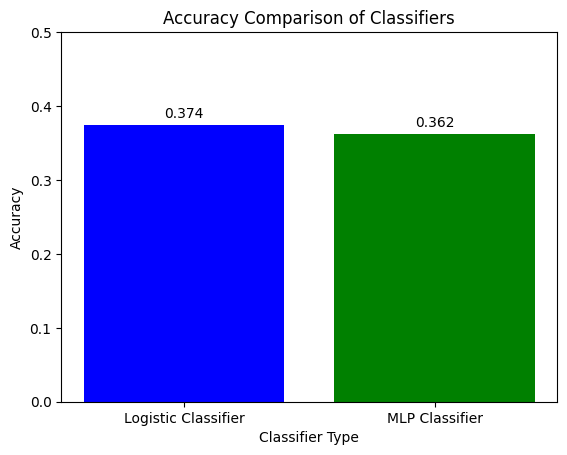

In [24]:
from sklearn.metrics import accuracy_score

test_df = pd.read_csv("test_dataset.csv")

test_inputs = test_df[["Age","Gender","Total_App_Usage_Hours","Daily_Screen_Time_Hours","Number_of_Apps_Used"]]

y_actual = test_df["most_used_app_category"]

y_predicted_lr = lr_classifier.predict(test_inputs.to_numpy())
lr_accuracy_score = accuracy_score(y_predicted_lr,y_actual)

y_predicted_mlp = mlp_classifier.predict(test_inputs.to_numpy())
mlp_accuracy_score = accuracy_score(y_predicted_mlp,y_actual)

print (f"Accuracy of the Logistic Classifier = {lr_accuracy_score}")
print (f"Accuracy of the MLP Classifier = {mlp_accuracy_score}")

classifiers = ['Logistic Classifier', 'MLP Classifier']
accuracies = [lr_accuracy_score, mlp_accuracy_score]

plt.bar(classifiers, accuracies, color=['blue', 'green'])

plt.ylabel('Accuracy')
plt.xlabel('Classifier Type')
plt.title('Accuracy Comparison of Classifiers')
plt.ylim(0, 0.5)

for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.3f}", ha='center')

plt.show()

# 5. Using The Better Model for Output Testing

In [25]:
import pickle
import numpy

age = 26
gender = 1
total_app_hours = 10
daily_screen_hours = 15
number_of_apps_used = 23

input_data =numpy.array([[age, gender, total_app_hours, daily_screen_hours, number_of_apps_used]])

y_predicted_lr = lr_classifier.predict(input_data)

if y_predicted_lr[0]==0:
    print ("The person is mostly a social media user.")
elif y_predicted_lr[0]==1:
    print ("The person is mostly a productivity app user.")
elif y_predicted_lr[0]==2:
    print ("The person is mostly a gaming app user.")

The person is mostly a productivity app user.


# 6. Assessing Model Fairness Through Gender

In [26]:
from sklearn.metrics import classification_report

female_data = test_data[test_data["Gender"] == 0]
male_data = test_data[test_data["Gender"] == 1]

# Classification Report of Logistic Regression Classifier
y_predicted_female = lr_classifier.predict(female_data[["Age","Gender","Total_App_Usage_Hours","Daily_Screen_Time_Hours","Number_of_Apps_Used"]].to_numpy())
y_predicted_male = lr_classifier.predict(male_data[["Age","Gender","Total_App_Usage_Hours","Daily_Screen_Time_Hours","Number_of_Apps_Used"]].to_numpy())

male_report = classification_report(
    male_data["most_used_app_category"],
    y_predicted_male,
    target_names=["Social Media", "Productivity", "Gaming"]
)

female_report = classification_report(
    female_data["most_used_app_category"],
    y_predicted_female,
    target_names=["Social Media", "Productivity", "Gaming"]
)

print("Logistic Regression Classifier:")
print("Classification Report for Males:")
print(male_report)

print("\nClassification Report for Females:")
print(female_report)

# Classification Report of MLP Classifier
z_predicted_female = mlp_classifier.predict(female_data[["Age","Gender","Total_App_Usage_Hours","Daily_Screen_Time_Hours","Number_of_Apps_Used"]].to_numpy())
z_predicted_male = mlp_classifier.predict(male_data[["Age","Gender","Total_App_Usage_Hours","Daily_Screen_Time_Hours","Number_of_Apps_Used"]].to_numpy())

new_male_report = classification_report(
    male_data["most_used_app_category"],
    z_predicted_male,
    target_names=["Social Media", "Productivity", "Gaming"]
)

new_female_report = classification_report(
    female_data["most_used_app_category"],
    z_predicted_female,
    target_names=["Social Media", "Productivity", "Gaming"]
)

print("MLP Classifier:")
print("Classification Report for Males:")
print(new_male_report)

print("\nClassification Report for Females:")
print(new_female_report)

Logistic Regression Classifier:
Classification Report for Males:
              precision    recall  f1-score   support

Social Media       0.37      0.18      0.24        83
Productivity       0.40      0.60      0.48        92
      Gaming       0.35      0.34      0.34        80

    accuracy                           0.38       255
   macro avg       0.37      0.37      0.36       255
weighted avg       0.37      0.38      0.36       255


Classification Report for Females:
              precision    recall  f1-score   support

Social Media       0.36      0.51      0.42        85
Productivity       0.33      0.03      0.05        77
      Gaming       0.37      0.54      0.44        83

    accuracy                           0.37       245
   macro avg       0.36      0.36      0.30       245
weighted avg       0.36      0.37      0.31       245

MLP Classifier:
Classification Report for Males:
              precision    recall  f1-score   support

Social Media       0.34      0.36

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

#  7. Using LIME Method to Determine The Model's Decision Making Ability

In [27]:
try:
    import lime
except:
    !pip install lime
    import lime

In [28]:
import lime
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(
    training_data=train_features.to_numpy(),
    feature_names=train_features.columns,
    class_names=["Social Media", "Productivity", "Gaming"],
    mode='classification'
)

In [29]:
# Sample Feature Values
age = 45
gender = 0
total_app_hours = 6.7
daily_screen_hours = 9
number_of_apps_used = 20

input_data =numpy.array([age, gender,total_app_hours, daily_screen_hours, number_of_apps_used])

exp = explainer.explain_instance(
    data_row=input_data,
    predict_fn=lr_classifier.predict_proba
)

exp.show_in_notebook(show_table=True)